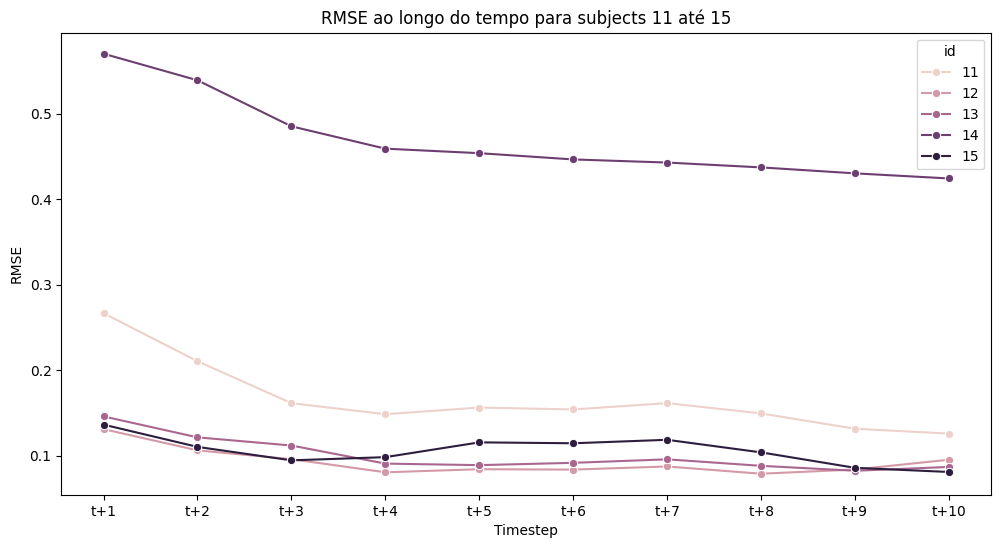

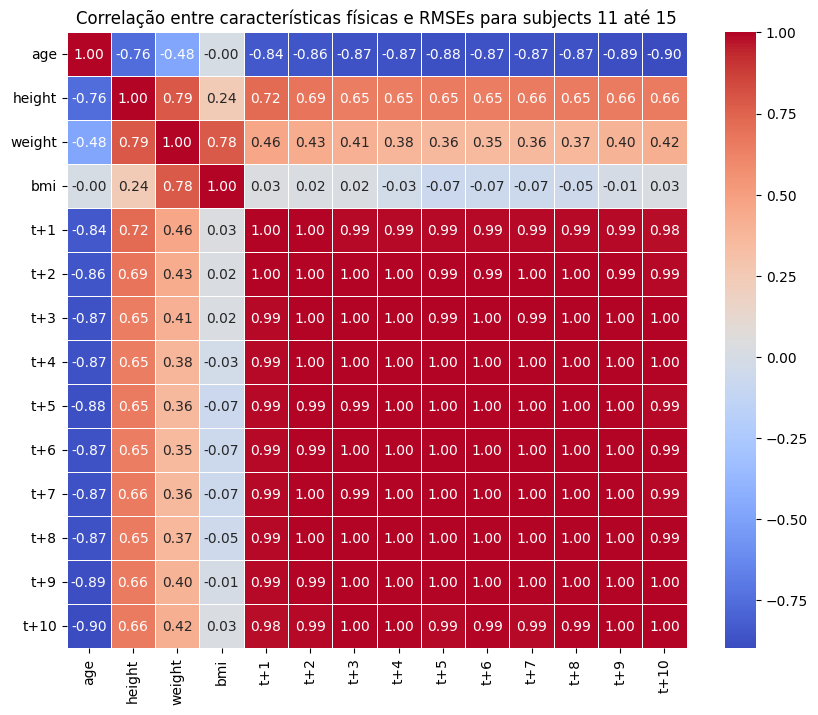

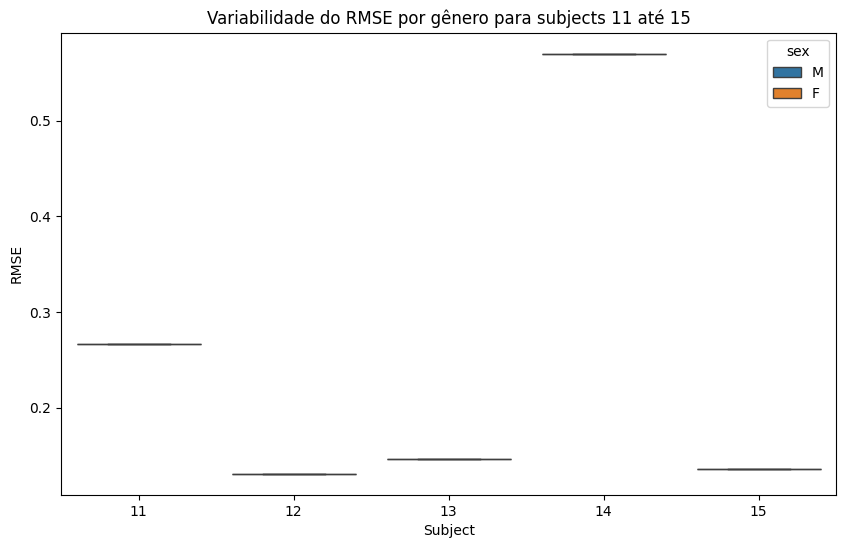

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'id': [11, 12, 13, 14, 15],
    'sex': ['M', 'F', 'F', 'M', 'F'],
    'age': [56.0, 46.0, 67.0, 23.0, 56.0],
    'height': [175.4, 169.2, 153.0, 177.9, 158.0],
    'weight': [81.45, 81.40, 64.90, 80.00, 48.30],
    'bmi': [26.5, 28.4, 27.7, 25.3, 19.3],
    't+1': [0.2665850520133972, 0.1310880482196808, 0.14598597586154938, 0.5699069499969482, 0.13635975122451782],
    't+2': [0.21047429740428925, 0.10630936920642853, 0.12150727212429047, 0.5388553142547607, 0.11035392433404922],
    't+3': [0.1614588499069214, 0.09598291665315628, 0.11197270452976227, 0.48505422472953796, 0.09463949501514435],
    't+4': [0.14855915307998657, 0.0806662067770958, 0.09081640839576721, 0.458941251039505, 0.09836586564779282],
    't+5': [0.15635043382644653, 0.08426187932491302, 0.0890258252620697, 0.4536600708961487, 0.11565103381872177],
    't+6': [0.15411530435085297, 0.08382437378168106, 0.09172563999891281, 0.44635236263275146, 0.11459065973758698],
    't+7': [0.1615252047777176, 0.08746974915266037, 0.09580893069505692, 0.442691832780838, 0.11864205449819565],
    't+8': [0.14943203330039978, 0.07899501174688339, 0.08821030706167221, 0.4370313882827759, 0.10392830520868301],
    't+9': [0.1315644532442093, 0.08394856005907059, 0.0824727937579155, 0.43007126450538635, 0.08588247001171112],
    't+10': [0.1258760243654251, 0.09535926580429077, 0.08690787106752396, 0.4241023063659668, 0.08104375004768372]
}

df = pd.DataFrame(data)

timesteps = [f't+{i}' for i in range(1, 11)]
df_rmse = df[['id'] + timesteps]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rmse.melt(id_vars='id', var_name='Timestep', value_name='RMSE'), x='Timestep', y='RMSE', hue='id', marker='o')
plt.title('RMSE ao longo do tempo para subjects 11 até 15')
plt.xlabel('Timestep')
plt.ylabel('RMSE')
plt.show()

df_corr = df[['age', 'height', 'weight', 'bmi'] + timesteps]
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação entre características físicas e RMSEs para subjects 11 até 15')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_rmse.melt(id_vars='id', var_name='Timestep', value_name='RMSE'), x='id', y='RMSE', hue=df['sex'])
plt.title('Variabilidade do RMSE por gênero para subjects 11 até 15')
plt.xlabel('Subject')
plt.ylabel('RMSE')
plt.show()


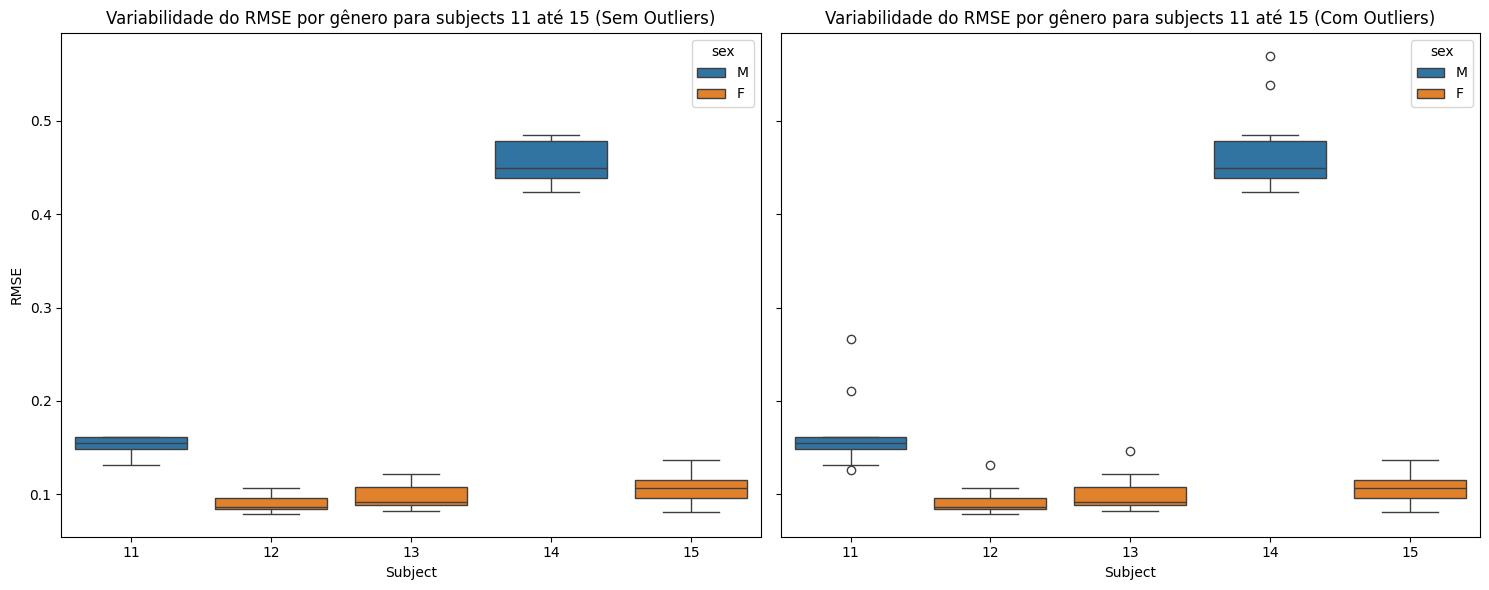

In [12]:
timesteps = [f't+{i}' for i in range(1, 11)]
df_rmse = df[['id', 'sex'] + timesteps]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

sns.boxplot(ax=axes[0], data=df_rmse.melt(id_vars=['id', 'sex'], var_name='Timestep', value_name='RMSE'),
            x='id', y='RMSE', hue='sex', showfliers=False)
axes[0].set_title('Variabilidade do RMSE por gênero para subjects 11 até 15 (Sem Outliers)')
axes[0].set_xlabel('Subject')
axes[0].set_ylabel('RMSE')

sns.boxplot(ax=axes[1], data=df_rmse.melt(id_vars=['id', 'sex'], var_name='Timestep', value_name='RMSE'),
            x='id', y='RMSE', hue='sex')
axes[1].set_title('Variabilidade do RMSE por gênero para subjects 11 até 15 (Com Outliers)')
axes[1].set_xlabel('Subject')
axes[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()